# CA02 - Training Perceptron and Adaline models

Make sure you: a) describe briefly what you intend to do using markdown cells; b) comment your code properly but briefly, such that the reader can easily understand what the code is doing.


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from adaline import AdalineGD
from perceptron import Perceptron


# Import the relevant classes from adaline.py and perceptron.py in the classifiers folder

## Loading and exploring data


Visualise the raw data with appropriate plots and inspect it for possible outliers or inconsistencies. Comment briefly on what you see and how this will impact the performance of the perceptron and adaline. For this use no more than three sentences.

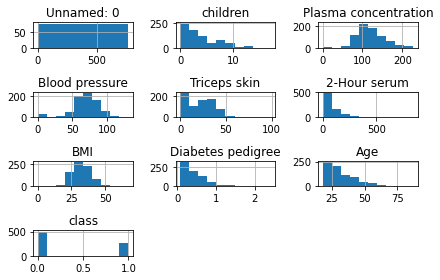

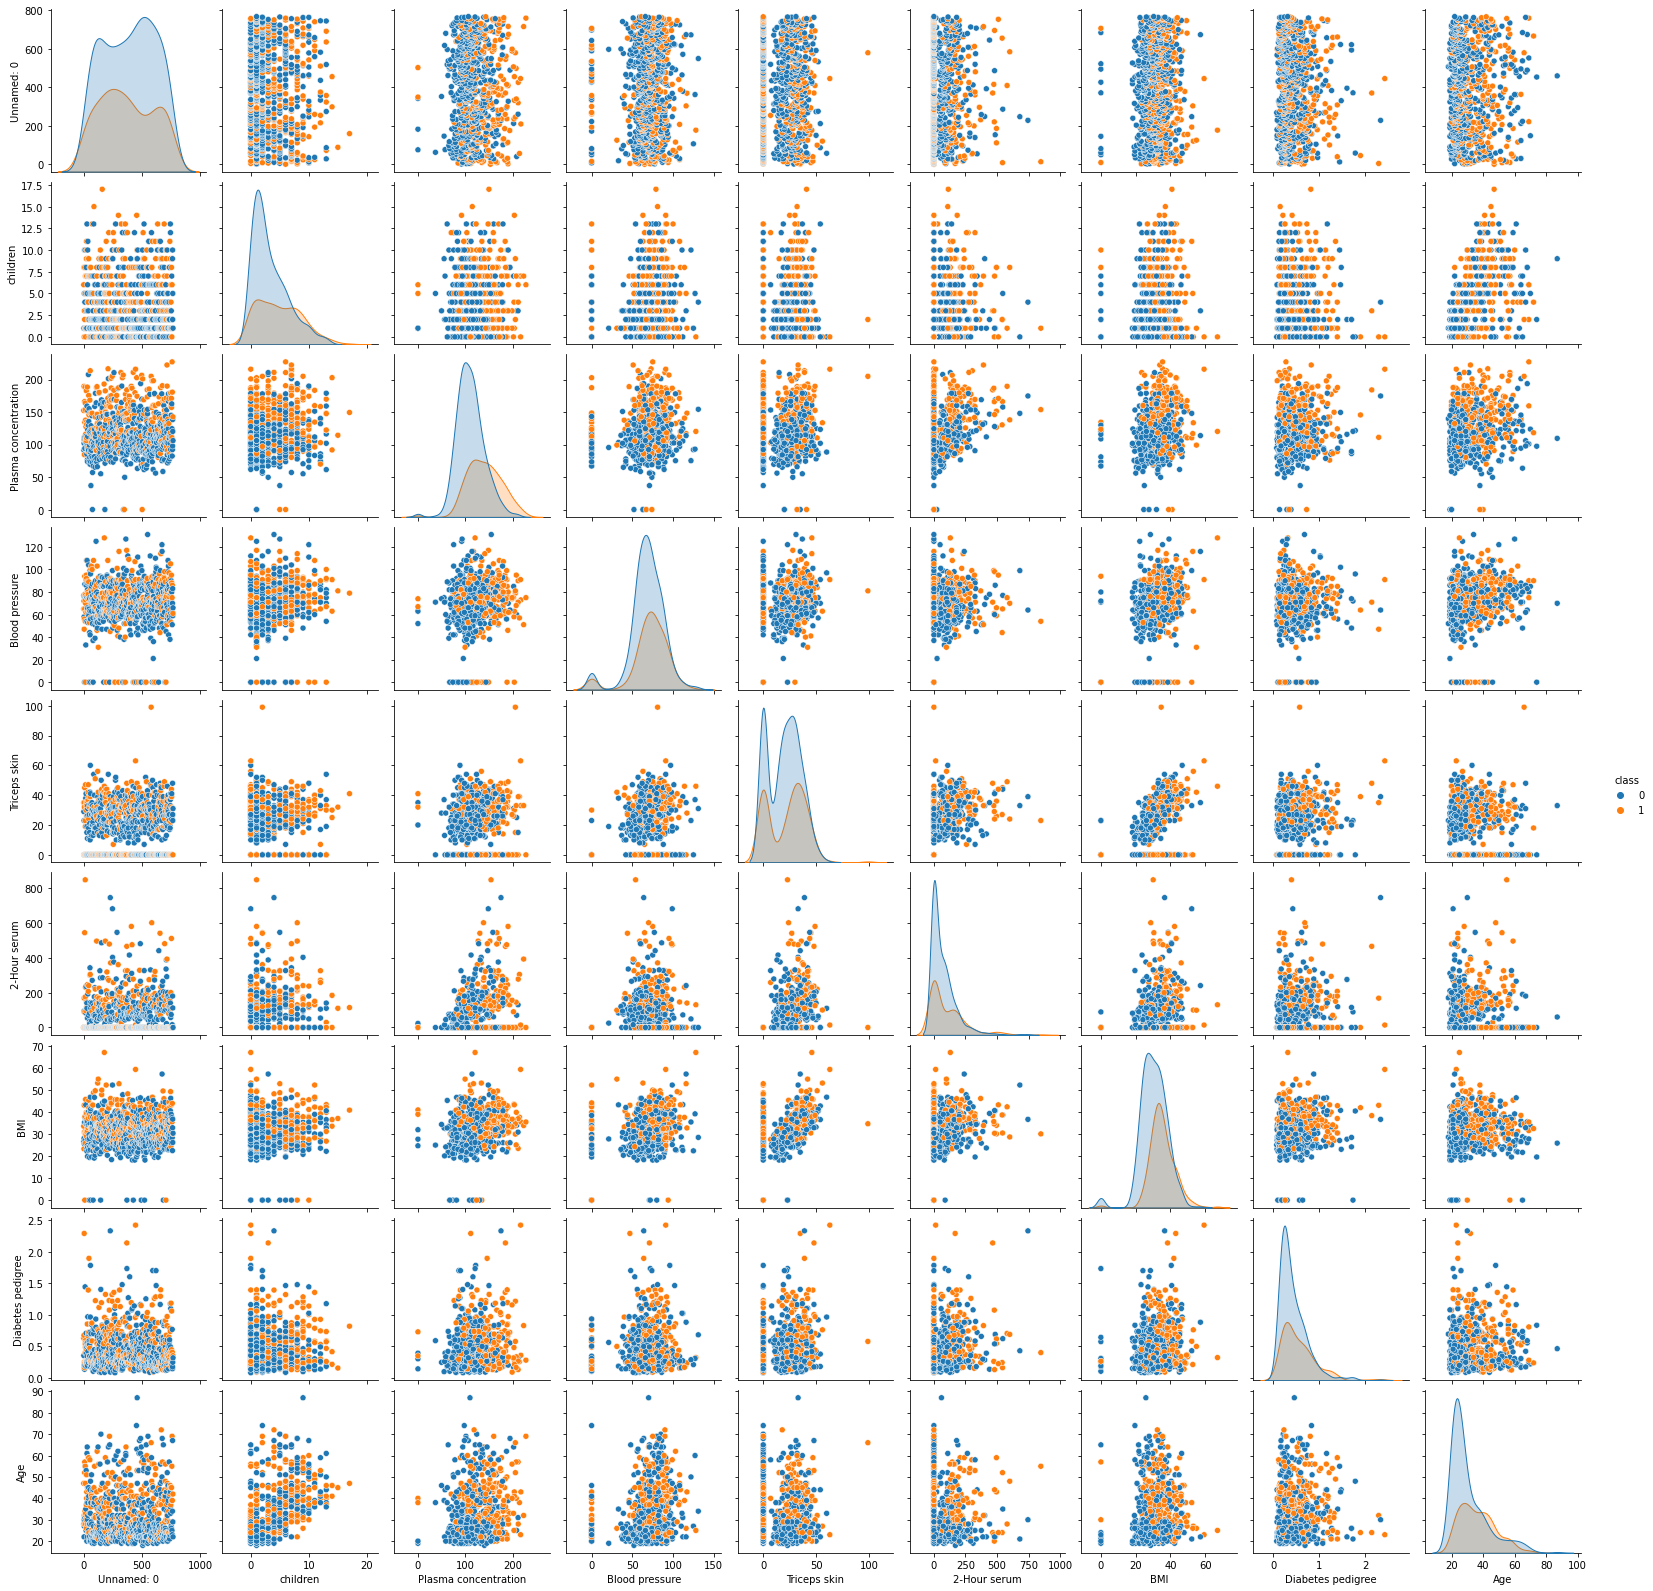

In [2]:
# Insert your code below
# ======================

data = pd.read_csv('diabetes_data.csv') # Loading in the dataframe
data


# Histograms below

data.hist()
plt.tight_layout()
plt.show()


data.describe() # Descriptive stats


sns.pairplot(data, hue='class')

# As one can see, the pairplots show that there are several outliers in the data.
# The data is divided into classes, where the unnamed one is unnescessary.
# Because of the outliers, the perceptron and adaline will be negatively impacted when classifying.

## Preprocessing data and training models

- Split the data into training and test_sets, where 400 samples are used for training, the remaing rows should be used for testing.
- Make sure the target values are appropriate for the Adaline and Perceptron classifiers
- Make sure that no data leakage occurs when scaling the data

With each of the 400 models, you should predict the classes of the unseen samples in the test data and compute the test set classification accuracy. Store the results in a (8 x 50) numpy array or a pandas dataframe.

In [3]:
data.drop(columns=['Unnamed: 0'], inplace= True) # Dropping the unnamed column

__Preprocessing:__

In [4]:
# Insert your code below
# ======================

data['class'] = np.where(data['class'] == 0, -1, data['class'])

#Split into training and test data 
X_train = data.iloc[:400, :-1].values
y_train = data.iloc[:400, -1].values

#Split into training and test targets
X_test = data.iloc[401:, :-1].values
y_test = data.iloc[401:, -1].values


__Training:__

### Training first the Perceptron:

In [5]:
# Insert your code below
# ======================

row_train = [50,100,150,200,250,300,350,400] 
epochs = range(1, 51) # Making the epochs range from 1 to 50

perceptron_models = [] # Making an empty list for the perceptron models
perceptron_acc_data = [] # Empty list for accuracy data

for row in row_train:
    # print(f'\nNow training with row: {row}\n')
    models = []
    perceptron_acc = []
    X_train_sc = (X_train[:row] - np.mean(X_train[:row], axis=0)) / np.std(X_train[:row], axis=0, ddof=1) # Scaling the training data
    X_test_sc = (X_test - np.mean(X_train[:row], axis=0)) / np.std(X_train[:row], axis=0, ddof=1) # Scaling the test data
    
    for epoch in epochs:
        # print(f'The current epoch is: {epoch}')
        perceptron = Perceptron(eta=0.0001, n_iter=epoch, random_state=1)
        perceptron.fit(X_train_sc, y_train[:row])
        y_perc_predict = perceptron.predict(X_test_sc)
        hidden = len(y_test) - (y_test != y_perc_predict).sum()
        perceptron_acc.append(hidden/len(y_test))
        models.append(y_perc_predict)
    perceptron_models.append(models)
    perceptron_acc_data.append(perceptron_acc)
    
y_axis_perc = [f"Sample {y} out of 400 " for y in range(50,450,50)] # Sample size that streches from 50 to 400
x_axis_perc = [f"Epochs: {x} " for x in range(1,51)] 


df_perceptron = pd.DataFrame(perceptron_acc_data, index=y_axis_perc)
df_perceptron

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Sample 50 out of 400,0.346049,0.395095,0.455041,0.498638,0.539510,0.574932,0.594005,0.607629,0.618529,0.640327,...,0.599455,0.692098,0.585831,0.613079,0.653951,0.531335,0.607629,0.577657,0.640327,0.656676
Sample 100 out of 400,0.433243,0.561308,0.618529,0.653951,0.675749,0.716621,0.724796,0.713896,0.713896,0.708447,...,0.681199,0.727520,0.686649,0.708447,0.694823,0.749319,0.708447,0.716621,0.585831,0.667575
Sample 150 out of 400,0.531335,0.618529,0.664850,0.697548,0.716621,0.727520,0.754768,0.760218,0.743869,0.694823,...,0.711172,0.765668,0.694823,0.741144,0.700272,0.752044,0.719346,0.754768,0.724796,0.700272
Sample 200 out of 400,0.566757,0.673025,0.722071,0.757493,0.686649,0.702997,0.686649,0.697548,0.662125,0.692098,...,0.689373,0.697548,0.645777,0.653951,0.585831,0.662125,0.681199,0.664850,0.629428,0.664850
Sample 250 out of 400,0.594005,0.700272,0.760218,0.700272,0.640327,0.632153,0.596730,0.670300,0.675749,0.634877,...,0.629428,0.615804,0.629428,0.626703,0.591281,0.629428,0.610354,0.594005,0.645777,0.656676
Sample 300 out of 400,0.621253,0.711172,0.683924,0.558583,0.569482,0.441417,0.536785,0.561308,0.553134,0.542234,...,0.400545,0.493188,0.583106,0.604905,0.397820,0.580381,0.607629,0.509537,0.583106,0.553134
Sample 350 out of 400,0.651226,0.724796,0.534060,0.637602,0.656676,0.656676,0.564033,0.645777,0.637602,0.539510,...,0.520436,0.523161,0.588556,0.645777,0.599455,0.583106,0.626703,0.594005,0.599455,0.520436
Sample 400 out of 400,0.675749,0.738420,0.724796,0.645777,0.653951,0.610354,0.681199,0.651226,0.694823,0.640327,...,0.621253,0.711172,0.765668,0.678474,0.697548,0.730245,0.692098,0.702997,0.694823,0.670300


### Now training Adaline:

In [6]:
# Insert your code below
# ======================

row_train = [50,100,150,200,250,300,350,400] 
epochs = range(1, 51) # Making the epochs range from 1 to 50

adaline_models = [] # Making an empty list for the adaline models
adaline_acc_data = [] # Empty list for the accuracy data

for row in row_train:
    # print(f'\nNow training with row: {row}\n')
    models = []
    adaline_acc = []
    X_train_sc = (X_train[:row] - np.mean(X_train[:row], axis=0)) / np.std(X_train[:row], axis=0) # Scaling the training data
    X_test_sc = (X_test - np.mean(X_train[:row], axis=0)) / np.std(X_train[:row], axis=0) # Scaling the test data
    
    for epoch in epochs:
        # print(f'The current epoch is: {epoch}')
        adaline = AdalineGD(eta=0.0001, n_iter=epoch, random_state=1)
        adaline.fit(X_train_sc, y_train[:row])
        y_adaline_predict = adaline.predict(X_test_sc)
        hidden = len(y_test) - (y_test != y_adaline_predict).sum()
        adaline_acc.append(hidden/len(y_test))
        models.append(y_adaline_predict)
    adaline_models.append(models)
    adaline_acc_data.append(adaline_acc)


y_axis_ada = [f"Sample {y} out of 400" for y in range(50,450,50)] # Sample size that streches from 50 to 400
x_axis_ada = [f"Epochs: {x}"  for x in range(1,51)] 


df_adaline = pd.DataFrame(adaline_acc_data, index=y_axis_ada)
df_adaline

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Sample 50 out of 400,0.337875,0.356948,0.395095,0.419619,0.455041,0.498638,0.523161,0.544959,0.569482,0.583106,...,0.651226,0.651226,0.651226,0.651226,0.653951,0.653951,0.651226,0.651226,0.651226,0.651226
Sample 100 out of 400,0.395095,0.493188,0.583106,0.632153,0.651226,0.673025,0.678474,0.689373,0.689373,0.702997,...,0.754768,0.754768,0.754768,0.754768,0.754768,0.760218,0.760218,0.760218,0.760218,0.760218
Sample 150 out of 400,0.452316,0.572207,0.640327,0.683924,0.683924,0.694823,0.708447,0.730245,0.738420,0.754768,...,0.754768,0.754768,0.754768,0.754768,0.754768,0.754768,0.754768,0.754768,0.754768,0.757493
Sample 200 out of 400,0.506812,0.640327,0.681199,0.681199,0.708447,0.727520,0.732970,0.732970,0.722071,0.727520,...,0.749319,0.746594,0.746594,0.746594,0.746594,0.746594,0.752044,0.752044,0.754768,0.754768
Sample 250 out of 400,0.553134,0.678474,0.692098,0.727520,0.732970,0.730245,0.727520,0.730245,0.732970,0.735695,...,0.757493,0.760218,0.762943,0.762943,0.762943,0.762943,0.765668,0.765668,0.762943,0.762943
Sample 300 out of 400,0.580381,0.686649,0.705722,0.743869,0.741144,0.741144,0.741144,0.732970,0.735695,0.741144,...,0.773842,0.773842,0.773842,0.773842,0.776567,0.779292,0.782016,0.782016,0.782016,0.782016
Sample 350 out of 400,0.602180,0.697548,0.711172,0.752044,0.738420,0.735695,0.735695,0.735695,0.738420,0.741144,...,0.773842,0.773842,0.776567,0.779292,0.779292,0.779292,0.782016,0.782016,0.782016,0.779292
Sample 400 out of 400,0.621253,0.702997,0.741144,0.754768,0.746594,0.743869,0.741144,0.741144,0.735695,0.746594,...,0.779292,0.779292,0.773842,0.771117,0.771117,0.771117,0.773842,0.773842,0.773842,0.773842


## Visualizing results

Plot a heatmap of the results (test set classification accuracy) using Python plotting packages matplotlib or seaborn . See canvas for images of what the heatmaps should look like for the two classification algorithms.

### Heatmap of Perceptron's accuracy

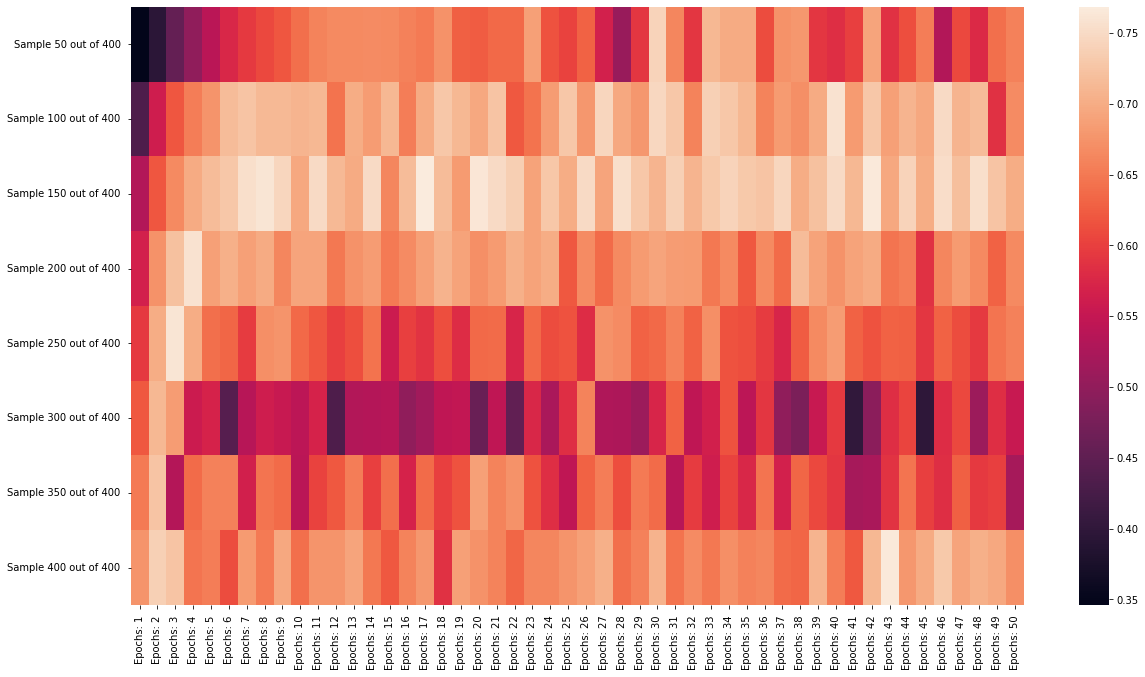

In [7]:
# Insert your code below
# ======================

plt.figure(figsize=(20, 11))
perceptron_heatmap = sns.heatmap(data= df_perceptron, xticklabels= x_axis_perc)


### Heatmap of Adaline's accuracy

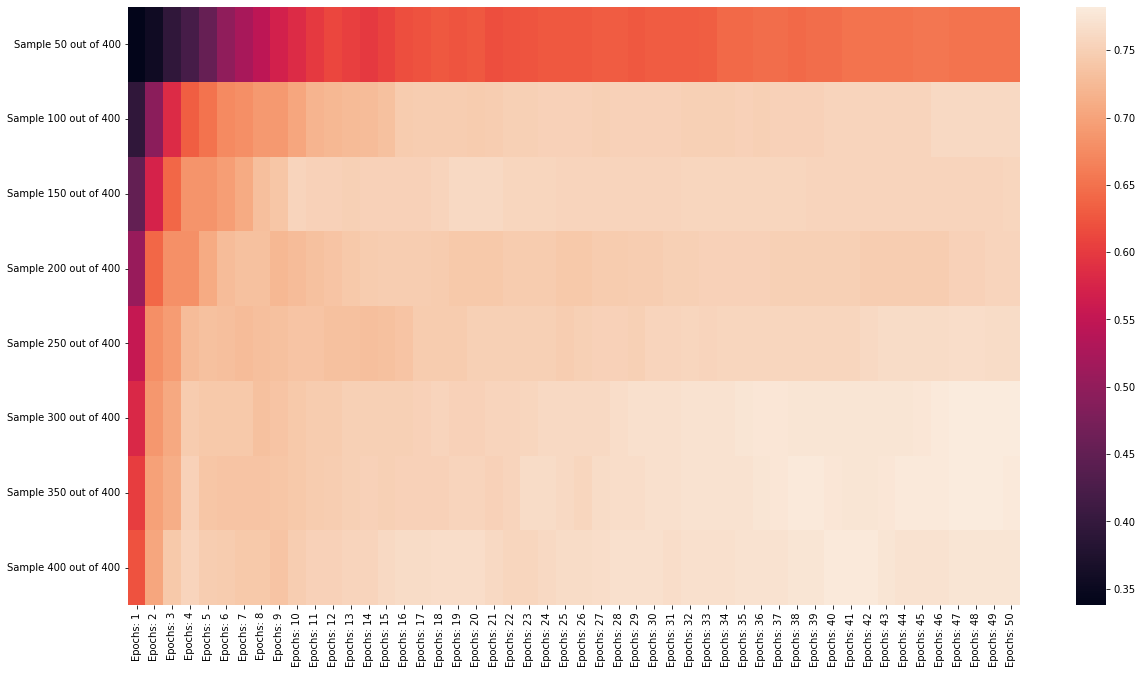

In [8]:
plt.figure(figsize=(20, 11))
adaline_heatmap = sns.heatmap(data= df_adaline, xticklabels= x_axis_ada)

## Metrics

Provide the maximum test set classification accuracy for each, the perceptron classifier and the adaline classifier and information on with which combination of number training data samples and number of epochs the best classification accuracy was achieved. 

In [9]:
# Insert your code below
# ======================

max_perceptron_samples = df_perceptron.max(axis=1) # The highest accuracies from each sample
max_adaline_samples = df_adaline.max(axis=1)

best_perceptron_sample = max_perceptron_samples.idxmax() # The sample where the best accuracy can be found
best_adaline_sample = max_adaline_samples.idxmax()

max_perceptron_acc = max_perceptron_samples.max() # The best accuracy overall
max_adaline_acc = max_adaline_samples.max()



print(f'\nThe highest perceptron accuracy per sample:\n {max_perceptron_samples}\n')
print(f'\nThe highest adaline accuracy per sample:\n {max_adaline_samples}\n')

print(f'\nThe best accuracy for the perceptron is: {max_perceptron_acc}\n This was achieved in {best_perceptron_sample}\n \
after training for {df_perceptron.max().idxmax()+1} epochs.\n')

print(f'\nThe best accuracy for the adaline is: {max_adaline_acc}\n This was achieved in {best_adaline_sample}\n \
after training for {df_adaline.max().idxmax()+1} epochs.\n')




The highest perceptron accuracy per sample:
 Sample 50 out of 400      0.741144
Sample 100 out of 400     0.757493
Sample 150 out of 400     0.768392
Sample 200 out of 400     0.757493
Sample 250 out of 400     0.760218
Sample 300 out of 400     0.711172
Sample 350 out of 400     0.724796
Sample 400 out of 400     0.765668
dtype: float64


The highest adaline accuracy per sample:
 Sample 50 out of 400     0.653951
Sample 100 out of 400    0.760218
Sample 150 out of 400    0.760218
Sample 200 out of 400    0.754768
Sample 250 out of 400    0.765668
Sample 300 out of 400    0.782016
Sample 350 out of 400    0.782016
Sample 400 out of 400    0.779292
dtype: float64


The best accuracy for the perceptron is: 0.7683923705722071
 This was achieved in Sample 150 out of 400 
 after training for 17 epochs.


The best accuracy for the adaline is: 0.782016348773842
 This was achieved in Sample 300 out of 400
 after training for 47 epochs.



## Discussion

1. The training time of the simpler perceptron algorithm is quite a bit longer than the training time of the adaline algorithm. What might be the reason for this?
2. The heatmap of the classification accuracy for the adaline algorithm is smoother than the perceptron heatmap. What might be the reason for this?

__Insert your answer below__

=====================

## 1. )

The reason for the training time being longer for the perceptron may be because the perceptron changes each single weight value 
while the model is training. Adaline on the other hand updates all the weights once every single epoch. In other words, Adaline
uses continuous predicted values, while perceptron does not.

---

## 2. )

The perceptron's the weights are learned based on the value derived from the unit step function. The output for the unit step function is binary. In the case of the adaline, the weights are learned by comparing the actual value 
with the activation function's output. The output from the actiavtion function is a continuous value. 
Since continuous values makes for more smoother transitions in regards to error surfaces,
the heatmap for the adaline algorithm turns out smoother than the perceptron's.